In [22]:
import numpy as np
np.random.seed(42)
normal = np.random.multivariate_normal((0,0), [[1, 0], [0, 2]], size=1000)

In [11]:
import matplotlib.pyplot as plt

In [12]:
import seaborn as sns

In [48]:
anom = np.random.multivariate_normal((-3,-3), [[1, -1], [-1, 2]], size=10)
anom_out = np.array([[4, -3], [4,-2]])

<AxesSubplot:>

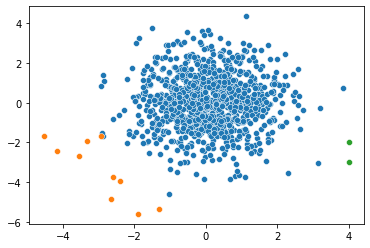

In [49]:
sns.scatterplot(x=normal[:,0], y=normal[:,1])
sns.scatterplot(x=anom[:,0], y=anom[:,1])
sns.scatterplot(x=anom_out[:,0], y=anom_out[:,1])

In [50]:
y_normal = np.zeros(normal.shape[0])

In [53]:
anom_comb = np.concatenate([anom, anom_out])
y_anom = np.ones(anom_comb.shape[0])

In [54]:
X_data = np.concatenate([normal, anom_comb])
y_data = np.concatenate([y_normal, y_anom])

<AxesSubplot:>

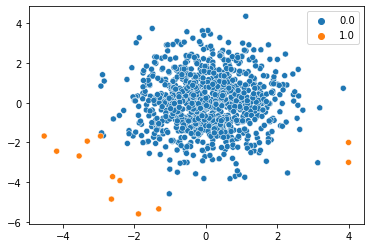

In [55]:
sns.scatterplot(x=X_data[:,0], y=X_data[:, 1], hue=y_data)

In [56]:
from imblearn.over_sampling import ADASYN, SMOTE

In [85]:
num_min = 200

ada = ADASYN(random_state=42, sampling_strategy={1: num_min})
smote = SMOTE(random_state=42, sampling_strategy={1: num_min})

In [86]:
X_data_ada, y_data_ada = ada.fit_resample(X_data, y_data)
X_data_smote, y_data_smote = smote.fit_resample(X_data, y_data)


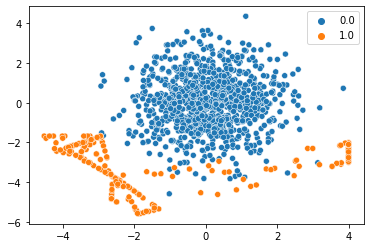

In [87]:
plot_data(X_data_ada, y_data_ada)

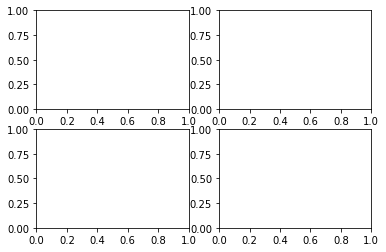

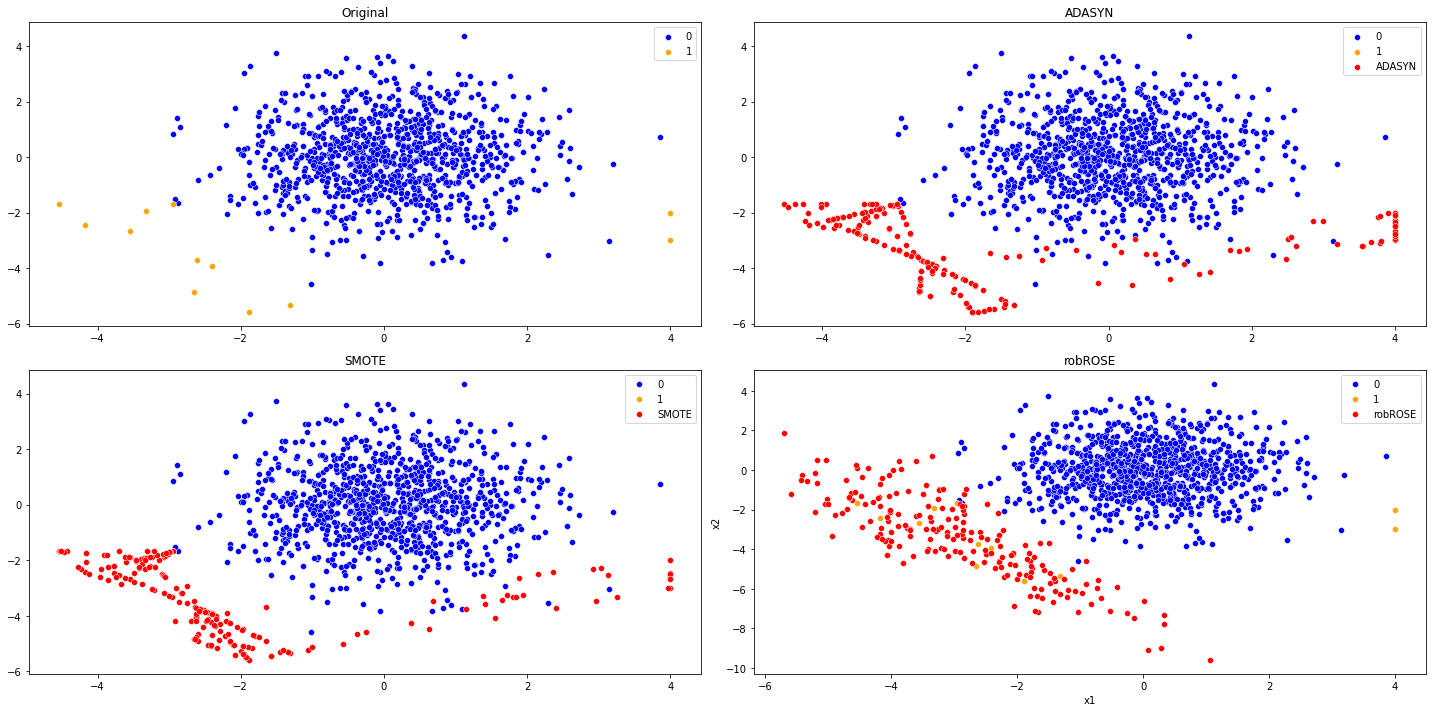

In [129]:
fig, ax = plt.subplots(2,2, figsize=(20, 10))

# Original
sns.scatterplot(x=normal[:,0], y=normal[:,1], color='blue', ax=ax[0][0], label='0')
sns.scatterplot(x=anom_comb[:,0], y=anom_comb[:,1], color='orange', ax=ax[0][0], label='1')
ax[0][0].set_title('Original')

# ADASYN
sns.scatterplot(x=normal[:,0], y=normal[:,1], color='blue', ax=ax[0][1], label='0')
sns.scatterplot(x=anom_comb[:,0], y=anom_comb[:,1], color='orange', ax=ax[0][1], label='1')
sns.scatterplot(x=X_data_ada[-num_min:, 0], y=X_data_ada[-num_min:, 1], color='red', ax=ax[0][1], label='ADASYN')
ax[0][1].set_title('ADASYN')

# SMOTE
sns.scatterplot(x=normal[:,0], y=normal[:,1], color='blue', ax=ax[1][0], label='0')
sns.scatterplot(x=anom_comb[:,0], y=anom_comb[:,1], color='orange', ax=ax[1][0], label='1')
sns.scatterplot(x=X_data_smote[-200:, 0], y=X_data_smote[-200:, 1], color='red', ax=ax[1][0], label='SMOTE')
ax[1][0].set_title('SMOTE')


# robROSE
sns.scatterplot(x=normal[:,0], y=normal[:,1], color='blue', ax=ax[1][1], label='0')
sns.scatterplot(x=anom_comb[:,0], y=anom_comb[:,1], color='orange', ax=ax[1][1], label='1')
sns.scatterplot(x=rr.x1, y=rr.x2, color='red', ax=ax[1][1], label='robROSE')
ax[1][1].set_title('robROSE')

fig.tight_layout()

In [130]:
fig.savefig('scatterplot_comparison.png')

In [104]:
import pandas as pd

In [106]:
data = pd.DataFrame(X_data, columns=['x1', 'x2'])
data['y'] = y_data

In [107]:
data

,x1,x2,y
0,-0.138264,0.702460,0.0
1,1.523030,0.915970,0.0
2,-0.234137,-0.331143,0.0
3,0.767435,2.233344,0.0
4,0.542560,-0.663937,0.0
...,...,...,...
1007,-3.323601,-1.932594,1.0
1008,-1.888158,-5.595523,1.0
1009,-4.531599,-1.675249,1.0
1010,4.000000,-3.000000,1.0


In [108]:
data.to_csv('toy_data.csv', index=False)

In [111]:
rr = pd.read_csv('toy_data_robrose.csv', index_col=0)

In [112]:
rr

,x1,x2,y
1,-3.354056,0.726491,1
2,-0.964859,-6.220043,1
3,-3.374143,-3.478862,1
4,-4.883694,-2.262975,1
5,-2.223631,-3.027787,1
...,...,...,...
196,-3.994687,-3.568594,1
197,-4.696573,-1.969882,1
198,-3.917163,-1.159302,1
199,-3.340511,-2.969662,1


In [131]:
from sklearn.linear_model import LogisticRegression

In [140]:
lr = LogisticRegression(random_state=42)

In [141]:
lr.fit(data[['x1','x2']], data.y)

LogisticRegression(random_state=42)

In [134]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

In [137]:
?lr._class_weight

In [139]:
lr.class_weight

D:\Users\Reverse\anaconda3\envs\bt4012\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


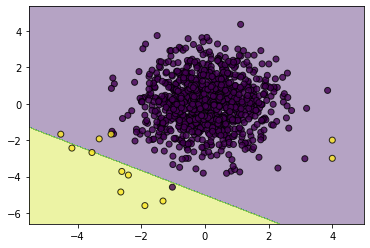

In [143]:
fig, ax = plt.subplots()
plot_decision_function(data[['x1','x2']].to_numpy(), data.y, lr, ax=ax)

D:\Users\Reverse\anaconda3\envs\bt4012\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


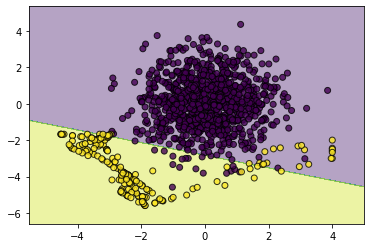

In [145]:
fig, ax = plt.subplots()
lr.fit(X_data_smote, y_data_smote)
plot_decision_function(X_data_smote, y_data_smote, lr, ax=ax)

D:\Users\Reverse\anaconda3\envs\bt4012\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


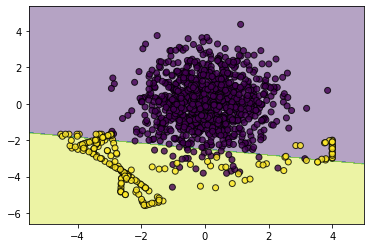

In [146]:
fig, ax = plt.subplots()
lr.fit(X_data_ada, y_data_ada)
plot_decision_function(X_data_ada, y_data_ada, lr, ax=ax)

In [148]:
data_robrose = pd.concat([data, rr])

D:\Users\Reverse\anaconda3\envs\bt4012\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


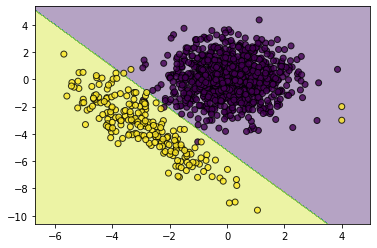

In [150]:
fig, ax = plt.subplots()
lr.fit(data_robrose[['x1','x2']], data_robrose.y)
plot_decision_function(data_robrose[['x1','x2']].to_numpy(), data_robrose.y, lr, ax=ax)